# Creating a MVP for a Song Recommendation Tool 

### Step 1: Scrape the data to be used as reference for the model

In [1]:

import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [2]:
url = "https://www.billboard.com/charts/hot-100/"


In [3]:
response = requests.get(url)
top100=BeautifulSoup(response.content,'html.parser')


In [4]:
top100.select('span.c-label.a-font-primary-s')[0].get_text(strip=True)


'Adele'

In [5]:
top100.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)


'Easy On Me'

In [6]:
top_100 = len(top100.select('h3.c-title.a-no-trucate'))


In [7]:

song = []
artist = []

for i in tqdm(range(top_100)):
    song.append(top100.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(top100.select('span.c-label.a-font-primary-s')[i].get_text(strip=True))
    
    
   

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
 top100_table = pd.DataFrame({'song':song, 'artist':artist})
top100_table

,song,artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele
...,...,...
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux


### Step 2: Build the Recommender

In [9]:
#creating the user input 
song = input("Search here for a song! ").lower()

Search here for a song! baby


In [10]:
#Checking if the input is actually in the data frame

check = top100_table[top100_table['song'].str.lower().str.contains(song)]
check

,song,artist
2,Industry Baby,Lil Nas X & Jack Harlow


In [11]:
#assign the relevant index number to list for later string-operations, model identifies song names through index

index = check.index.tolist()

In [12]:
top100_table.song[index].values[0]

'Industry Baby'

In [13]:
# check if a value has been returned in the input or not - (is the value in our dataframe or not)
if len(check) == 0:
    print("That ain't it chief, try again..")
else: # in case the song was spelt in correctly, confirm the song name
    answer = input("Did you mean "+ top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
        
    if answer.lower() == 'yes':
        suggestion = top100_table.sample().index.tolist()
        print("Well you got good taste alright! Here's another banger you might like called " + top100_table['song'][suggestion].item() + " by " +  top100_table['artist'][suggestion].item())
    else: 
        print ("I got nothing else for you, you should be dissapointed.. " )
        
        



  

Did you mean Industry Baby by Lil Nas X & Jack Harlow? baby
I got nothing else for you, you should be dissapointed.. 


### Breaking each step down 

In [14]:
#step 1: create user input: 

song = input("Enter your song here  ").lower()




# converting input to lowercase to standardize it 

Enter your song here  baby


In [15]:
#step 2: create a check field to find if the user input is in the dataframe, if not? 

mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
mic_check


# need to add str since lower only works if the value is a string, 
#the outer[] is to return the exact value and not a list of true and false
#contains makes sure we are working on the user input

,song,artist
2,Industry Baby,Lil Nas X & Jack Harlow


In [16]:
#Step 3: Assign the values an index so the recommender can return the names later based on that. 

index = mic_check.index.to_list()

#to_list converts values into a list so we can work with it later

In [17]:
#Step 4: Create value to return the required songs - that we will use in the actual recommender code

top100_table.song[index].values[0]

'Industry Baby'

In [18]:
mic_check

,song,artist
2,Industry Baby,Lil Nas X & Jack Harlow


In [19]:
#Step 5: Create scenarios for each input 

while True: 
        song = input("Enter your song here: ").lower()
        mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
        index = mic_check.index.to_list()
        top100_table.song[index].values[0]

        if len(mic_check) == 0:
                 print("That ain't it chief, try again")
        else: 
            answer=input("I think we're onto something, did you mean " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
  
            if answer.lower() == "yes":
                suggestion=top100_table.sample().index.to_list()
                print("Seems like you got good taste in music! Try this song out by " + top100_table['artist'][suggestion].item() + " it's called " + top100_table['song'][suggestion].item())
                break
            else: 
                input("Ok, let's try that again now ")
              

Enter your song here: baby
I think we're onto something, did you mean Industry Baby by Lil Nas X & Jack Harlow? yes
Seems like you got good taste in music! Try this song out by Chris Stapleton it's called You Should Probably Leave


In [20]:

while True: 
        song = input("Enter your song here: ").lower()
        mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
        index = mic_check.index.to_list()
        top100_table.song[index].values[0]

        if len(mic_check) == 0:
                 print("That ain't it chief, try again")
                 continue
        else: 
            answer=input("I think we're onto something, did you mean " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
  
            if answer.lower() == "yes":
                suggestion=top100_table.sample().index.to_list()
                print("Seems like you got good taste in music! Try this song out by " + top100_table['artist'][suggestion].item() + " it's called " + top100_table['song'][suggestion].item())
                break
            else: 
                input("Ok, let's try that again now ")

Enter your song here: baby
I think we're onto something, did you mean Industry Baby by Lil Nas X & Jack Harlow? yes
Seems like you got good taste in music! Try this song out by State Of Mine & Drew Jacobs it's called God's Country


In [21]:
len(mic_check)

1

## Getting song data from Spotify

In [22]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [23]:
import getpass

In [24]:
# inputting our spotify id & secret in an encrypted way
client_id = str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [25]:
#embedding getpass credentials in the access key
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

#### Choosing a playlist

In [26]:
playlist=sp.user_playlist_tracks("SunSubiroRecords","3xMQTDLOIGvj3lWH5e5x6F")



In [27]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [28]:
playlist["items"][2].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [29]:
playlist["items"][2]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [30]:
def get_playlist_tracks(user_id,playlist_id):
    results=sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [31]:
playlist=sp.user_playlist_tracks("SunSubiroRecords","3xMQTDLOIGvj3lWH5e5x6F")

results2=get_playlist_tracks("SunSubiroRecords","3xMQTDLOIGvj3lWH5e5x6F")


In [32]:
len(results2)

689

In [33]:
results2[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [34]:
results2[0]['track']["uri"].rsplit(':',1)

['spotify:track', '5PjdY0CKGZdEuoNab3yDmX']

In [35]:
results2[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [36]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results2

In [37]:
for r in results2:
    song_URI.append(r['track']['uri'])

In [38]:
for r in results2:
    song_ID.append(r['track']['id'])

In [39]:
for r in results2:
    song_name.append(r['track']['name'])

In [40]:
for r in results2: 
    song_artist.append(r['track']['artists'][0]['name'])

In [41]:
import pandas as pd
playlist_song_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [42]:
playlist_song_info

,song_name,song_ID,song_artist
0,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,The Kid LAROI
1,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,Adele
2,INDUSTRY BABY (feat. Jack Harlow),5Z9KJZvQzH6PFmb8SNkxuk,Lil Nas X
3,More Than You Know,2yaZGI4MWkdCGmkTWYHW6u,Filip Nordin
4,abcdefu,4fouWK6XVHhzl78KzQ1UjL,GAYLE
...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene


In [43]:
feats = sp.audio_features(tracks=song_ID[0:99])

In [44]:
from tqdm.notebook import tqdm
audio_features = []
for song_ID in tqdm(range(len(playlist_song_info))):
    audio_features.extend(sp.audio_features(tracks=playlist_song_info['song_ID'][song_ID]))

  0%|          | 0/689 [00:00<?, ?it/s]

In [45]:
audio_features_df = pd.DataFrame(audio_features) 


In [46]:
names_audio_features_df = pd.merge(playlist_song_info, audio_features_df, left_on='song_ID',right_on='id', how='inner')

### Adding another playlist

In [47]:
playlist1=sp.user_playlist_tracks("Francisco_José_Carvalho","6BZypSVg53OPbx8iV7v2XC")


def get_playlist_tracks(user_id,playlist_id):
    results=sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


results2=get_playlist_tracks("Francisco_José_Carvalho","6BZypSVg53OPbx8iV7v2XC")



In [48]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results2

In [49]:
for r in results2:
    song_URI.append(r['track']['uri'])

In [50]:
for r in results2:
    song_ID.append(r['track']['id'])

In [51]:
for r in results2:
    song_name.append(r['track']['name'])

In [52]:
for r in results2: 
    song_artist.append(r['track']['artists'][0]['name'])

In [53]:
import pandas as pd
playlist_song_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [54]:
audio_features1 = []
for song_ID in tqdm(range(len(playlist_song_info))):
    audio_features1.extend(sp.audio_features(tracks=playlist_song_info['song_ID'][song_ID]))

  0%|          | 0/700 [00:00<?, ?it/s]

In [55]:
audio_features_df1 = pd.DataFrame(audio_features1) 


In [56]:
names_audio_features_df2 = pd.merge(playlist_song_info, audio_features_df1, left_on='song_ID',right_on='id', how='inner')

In [57]:
names_audio_features_df = pd.concat([names_audio_features_df2,names_audio_features_df])

In [58]:
names_audio_features_df


,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


In [59]:
names_audio_features_df


,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


### Final Merged Data Frame

In [60]:
names_audio_features_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


In [61]:
names_audio_features_df.index=names_audio_features_df.iloc[:,0]


In [62]:
names_audio_features_df.rename_axis(None,inplace=True)

In [63]:
names_audio_features_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
No Brainer,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
Magic,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
Heroes (we could be),Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
The House of the Rising Sun,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
Mayores,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Child O' Mine,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
Canada,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
Maybe It's Time,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
Ivy,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


In [64]:
import numpy as np
df=names_audio_features_df.select_dtypes([np.number])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
No Brainer,0.552,0.7600,0,-4.706,1,0.3420,0.073300,0.000000,0.0865,0.639,135.702,260000,5
Magic,0.738,0.4820,6,-8.917,0,0.0402,0.026600,0.621000,0.1060,0.352,93.457,285014,4
Heroes (we could be),0.503,0.7480,5,-4.124,1,0.0619,0.030500,0.000000,0.3430,0.356,125.896,210013,4
The House of the Rising Sun,0.316,0.4840,9,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.299,117.363,269907,3
Mayores,0.745,0.8360,5,-4.336,0,0.0444,0.145000,0.003140,0.1160,0.874,96.993,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Child O' Mine,0.747,0.2400,6,-12.393,1,0.0407,0.919000,0.000000,0.1250,0.399,115.965,132425,4
Canada,0.608,0.1500,11,-12.729,1,0.0321,0.863000,0.000000,0.1240,0.434,81.988,126951,4
Maybe It's Time,0.505,0.0974,7,-14.228,1,0.0331,0.886000,0.000000,0.1180,0.345,151.449,142105,4
Ivy,0.579,0.1620,9,-11.063,1,0.0577,0.908000,0.000000,0.1950,0.615,159.858,130312,4


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets

In [66]:
names_audio_features_df.columns.get_loc("tempo")


13

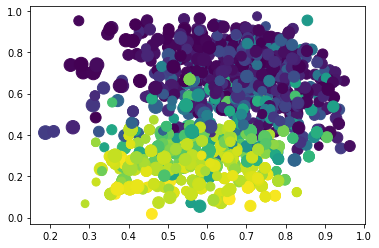

In [67]:
plt.scatter(names_audio_features_df.iloc[:,3],
            names_audio_features_df.iloc[:,4],
            names_audio_features_df.iloc[:,13],
            names_audio_features_df.iloc[:,9])

In [68]:
df=names_audio_features_df.select_dtypes([np.number])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
No Brainer,0.552,0.7600,0,-4.706,1,0.3420,0.073300,0.000000,0.0865,0.639,135.702,260000,5
Magic,0.738,0.4820,6,-8.917,0,0.0402,0.026600,0.621000,0.1060,0.352,93.457,285014,4
Heroes (we could be),0.503,0.7480,5,-4.124,1,0.0619,0.030500,0.000000,0.3430,0.356,125.896,210013,4
The House of the Rising Sun,0.316,0.4840,9,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.299,117.363,269907,3
Mayores,0.745,0.8360,5,-4.336,0,0.0444,0.145000,0.003140,0.1160,0.874,96.993,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Child O' Mine,0.747,0.2400,6,-12.393,1,0.0407,0.919000,0.000000,0.1250,0.399,115.965,132425,4
Canada,0.608,0.1500,11,-12.729,1,0.0321,0.863000,0.000000,0.1240,0.434,81.988,126951,4
Maybe It's Time,0.505,0.0974,7,-14.228,1,0.0331,0.886000,0.000000,0.1180,0.345,151.449,142105,4
Ivy,0.579,0.1620,9,-11.063,1,0.0577,0.908000,0.000000,0.1950,0.615,159.858,130312,4


## Scaling before clustering

In [69]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
No Brainer,0.552,0.760,0,-4.706,1,0.3420,0.073300,0.00000,0.0865,0.639,135.702,260000,5
Magic,0.738,0.482,6,-8.917,0,0.0402,0.026600,0.62100,0.1060,0.352,93.457,285014,4
Heroes (we could be),0.503,0.748,5,-4.124,1,0.0619,0.030500,0.00000,0.3430,0.356,125.896,210013,4
The House of the Rising Sun,0.316,0.484,9,-9.110,0,0.0308,0.000334,0.00445,0.0912,0.299,117.363,269907,3
Mayores,0.745,0.836,5,-4.336,0,0.0444,0.145000,0.00314,0.1160,0.874,96.993,203187,4


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
df_scaled = StandardScaler().fit_transform(df)

In [72]:
df_scaled.shape

(1389, 13)

In [73]:
df_scaled_df = pd.DataFrame(df_scaled,columns=['danceability','energy','key','loudness','mod','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature'])

In [74]:
df_scaled_df.head()

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.609178,1.177013,-1.521819,0.880334,0.741770,3.698407,-1.091965,-0.148678,-0.675160,0.788409,0.597586,1.296300,2.320390
1,0.733204,-0.013189,0.177155,-0.259119,-1.348126,-0.436262,-1.222019,11.104402,-0.517890,-0.611426,-0.872504,1.804708,0.187351
2,-0.962816,1.125638,-0.106007,1.037817,0.741770,-0.138971,-1.211158,-0.148678,1.393534,-0.591916,0.256346,0.280317,0.187351
3,-2.312416,-0.004626,1.026642,-0.311343,-1.348126,-0.565042,-1.295166,-0.068040,-0.637254,-0.869932,-0.040595,1.497659,-1.945688
4,0.783724,1.502392,-0.106007,0.980452,-1.348126,-0.378721,-0.892289,-0.091779,-0.437240,1.934615,-0.749454,0.141578,0.187351


In [75]:
df_scaled_df.describe()

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03
mean,-8.506514e-17,2.946207e-16,2.078171e-18,-3.053313e-17,6.931500e-16,3.288306e-16,-1.086084e-15,-1.711094e-16,2.054192e-17,2.760371e-16,-4.550670e-16,2.097354e-16,1.066741e-15
std,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00
min,-3.236206e+00,-2.000998e+00,-1.521819e+00,-4.777695e+00,-1.348126e+00,-6.691621e-01,-1.296026e+00,-1.486783e-01,-1.199390e+00,-2.040525e+00,-2.845826e+00,-2.047826e+00,-6.211766e+00
25%,-6.524807e-01,-8.394803e-01,-9.554945e-01,-3.638370e-01,-1.348126e+00,-5.129818e-01,-1.046850e+00,-1.486783e-01,-5.695070e-01,-7.333625e-01,-7.295493e-01,-8.004222e-01,1.873512e-01
50%,1.269671e-01,-1.544718e-01,-1.060075e-01,1.970952e-01,7.417703e-01,-3.869415e-01,-8.188794e-02,-1.486783e-01,-3.807840e-01,-6.027137e-02,-5.743824e-02,-2.482195e-02,1.873512e-01
75%,7.332043e-01,8.987288e-01,7.434795e-01,6.630505e-01,7.417703e-01,-7.450686e-03,1.073838e+00,-1.484735e-01,2.402274e-01,6.811044e-01,5.442741e-01,6.092759e-01,1.873512e-01
max,2.357054e+00,2.093212e+00,1.592966e+00,1.831727e+00,7.417703e-01,6.274013e+00,1.444228e+00,1.485543e+01,6.498732e+00,2.446749e+00,3.177388e+00,5.852077e+00,2.320390e+00


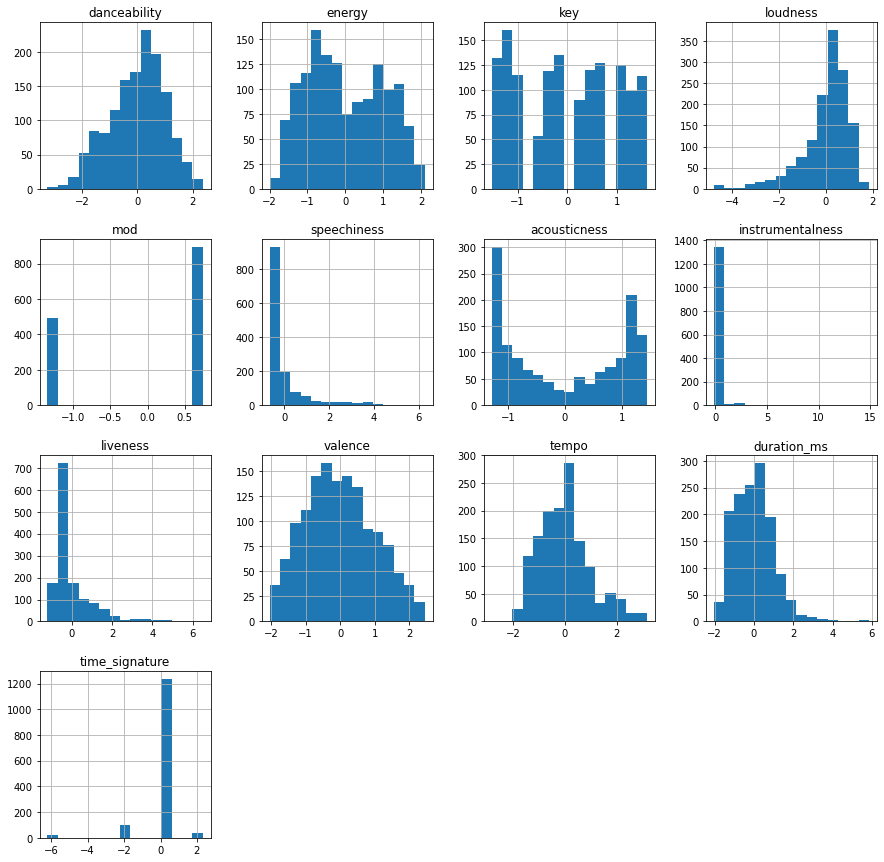

In [76]:
df_scaled_df.hist(bins=15,figsize=(15,15));

## Running Elbow and Silhouette Method to find how many clusters to have

In [77]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=40)
kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [78]:
kmeans1=KMeans(n_clusters=9)
kmeans1.fit(df)
print(kmeans1.inertia_)

99082714168.89088


In [79]:
K= range(2,20)


In [80]:
#gathering the k inertia values 
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

print(inertia)    

[1276307940546.8, 678430763416.3455, 416344240691.4638, 300997435165.276, 210633941183.32004, 159680323364.24335, 124879367074.85983, 98809269522.96132, 78215305914.53075, 64013669975.55607, 54323973196.80669, 45272461726.31912, 38841278609.5476, 34029866186.28655, 28883055863.578217, 25353961214.85501, 22152370446.177174, 19243079369.873196]


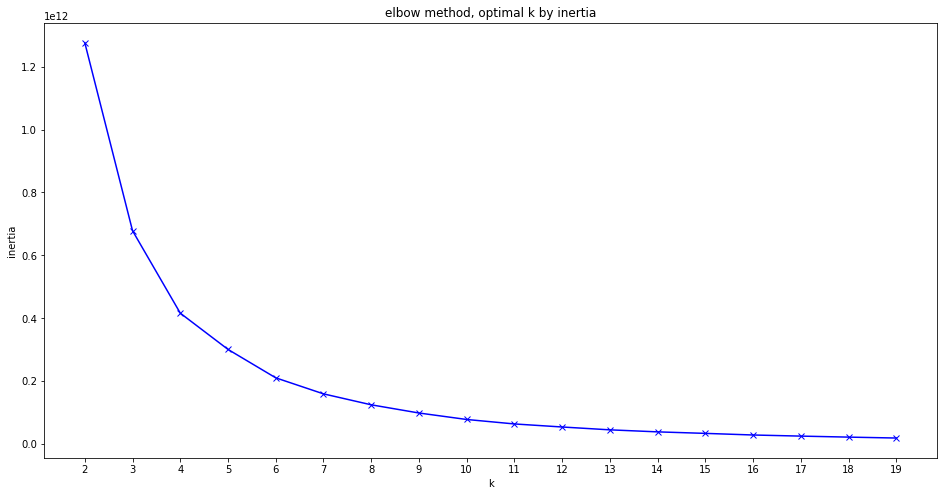

In [81]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

In [82]:
from sklearn.metrics import silhouette_score 
K= range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(df)
    silhouettes.append(silhouette_score(df, kmeans.predict(df)))

Text(0, 0.5, 'silhouette score')

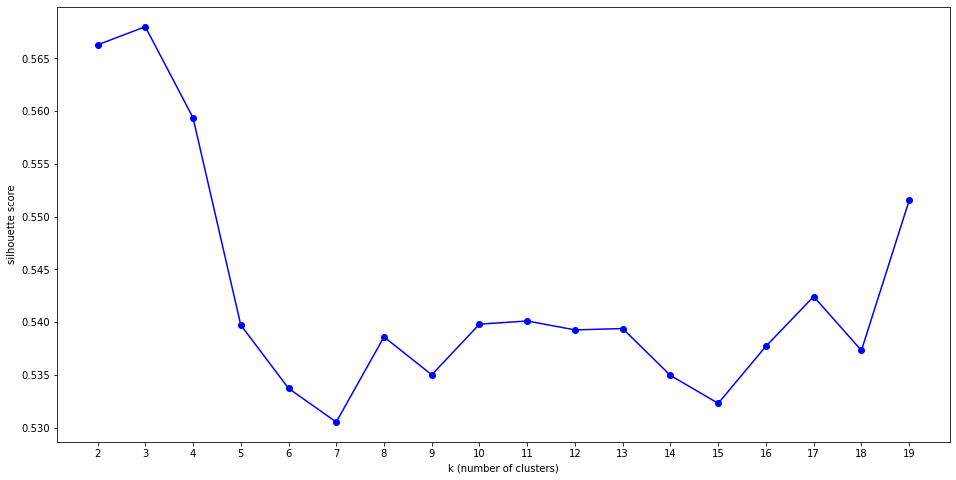

In [83]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

 Summary: we will use 8 clusters

In [84]:
kmeans=KMeans(n_clusters=8)

In [85]:
cluster_scaled=kmeans.fit(df_scaled_df)

In [86]:
cluster_scaled.cluster_centers_

array([[ 0.04851733, -0.6806347 ,  0.36563749, -0.04573174, -0.04760235,
        -0.40353   ,  0.87076597, -0.14815948, -0.03707412,  0.12282259,
        -0.32562795, -0.71366777,  0.24018187],
       [-0.68609554,  0.41681216, -0.03585467,  0.35442844,  0.28048686,
        -0.23962916, -0.5807399 , -0.09011025, -0.28908546, -0.85434581,
         0.18179974,  0.86095782,  0.15852632],
       [ 0.6637473 ,  0.95533709, -0.09552   ,  0.66326251, -0.24065966,
        -0.05796906, -0.90417244, -0.10344865, -0.24317438,  0.85105166,
        -0.15136623,  0.26118778,  0.19950524],
       [ 0.19248162,  0.5448354 , -0.29294961,  0.44675484, -0.02925946,
         0.1480646 , -0.60296037, -0.06781087,  2.57542147,  0.21236038,
         0.20350616,  0.03836577,  0.16664206],
       [ 0.72759949,  0.54911936,  0.19522902,  0.30521015, -0.21424617,
         3.08875603, -0.70639186, -0.08685576, -0.19534714,  0.04340086,
         0.28051717,  0.26564801,  0.25542689],
       [-0.23279632, -1.338592

In [87]:
cluster_scaled.labels_

array([4, 6, 1, ..., 5, 0, 7])

In [88]:
names_audio_features_df=df_scaled_df.copy()
names_audio_features_df['cluster']=cluster_scaled.labels_


In [89]:
names_audio_features_df

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,-0.609178,1.177013,-1.521819,0.880334,0.741770,3.698407,-1.091965,-0.148678,-0.675160,0.788409,0.597586,1.296300,2.320390,4
1,0.733204,-0.013189,0.177155,-0.259119,-1.348126,-0.436262,-1.222019,11.104402,-0.517890,-0.611426,-0.872504,1.804708,0.187351,6
2,-0.962816,1.125638,-0.106007,1.037817,0.741770,-0.138971,-1.211158,-0.148678,1.393534,-0.591916,0.256346,0.280317,0.187351,1
3,-2.312416,-0.004626,1.026642,-0.311343,-1.348126,-0.565042,-1.295166,-0.068040,-0.637254,-0.869932,-0.040595,1.497659,-1.945688,1
4,0.783724,1.502392,-0.106007,0.980452,-1.348126,-0.378721,-0.892289,-0.091779,-0.437240,1.934615,-0.749454,0.141578,0.187351,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,0.798158,-1.049264,0.177155,-1.199688,0.741770,-0.429412,1.263210,-0.148678,-0.364654,-0.382185,-0.089245,-1.296656,0.187351,5
1385,-0.205020,-1.434581,1.592966,-1.290606,0.741770,-0.547232,1.107257,-0.148678,-0.372719,-0.211473,-1.271616,-1.407915,0.187351,0
1386,-0.948382,-1.659778,0.460317,-1.696220,0.741770,-0.533532,1.171309,-0.148678,-0.421109,-0.645568,1.145569,-1.099910,0.187351,5
1387,-0.414316,-1.383206,1.026642,-0.839804,0.741770,-0.196511,1.232576,-0.148678,0.199902,0.671349,1.438195,-1.339603,0.187351,0


In [90]:
df_scaled_df_c=df_scaled_df.copy()
df_scaled_df_c['cluster']=cluster_scaled.labels_

In [91]:
df_scaled_df_c.head()

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,-0.609178,1.177013,-1.521819,0.880334,0.741770,3.698407,-1.091965,-0.148678,-0.675160,0.788409,0.597586,1.296300,2.320390,4
1,0.733204,-0.013189,0.177155,-0.259119,-1.348126,-0.436262,-1.222019,11.104402,-0.517890,-0.611426,-0.872504,1.804708,0.187351,6
2,-0.962816,1.125638,-0.106007,1.037817,0.741770,-0.138971,-1.211158,-0.148678,1.393534,-0.591916,0.256346,0.280317,0.187351,1
3,-2.312416,-0.004626,1.026642,-0.311343,-1.348126,-0.565042,-1.295166,-0.068040,-0.637254,-0.869932,-0.040595,1.497659,-1.945688,1
4,0.783724,1.502392,-0.106007,0.980452,-1.348126,-0.378721,-0.892289,-0.091779,-0.437240,1.934615,-0.749454,0.141578,0.187351,2


In [92]:
df_scaled_df_c['cluster'].value_counts()

2    351
0    323
1    222
5    152
7    125
3    103
4     94
6     19
Name: cluster, dtype: int64

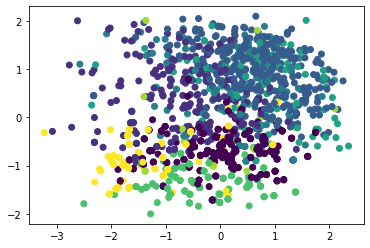

In [93]:
plt.scatter(df_scaled_df_c.iloc[:,0],df_scaled_df_c.iloc[:,1],c=df_scaled_df_c.iloc[:,13]);



## Updating the Recommender with Spotify Data to suggest songs from the same cluster

In [94]:

while True: 
        song = input("Enter your song here: ").lower()
        mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
        index = mic_check.index.to_list()
        top100_table.song[index].values[0]

        if len(mic_check) == 0:
                 print("That ain't it chief, try again")
        else: 
            answer=input("I think we're onto something, did you mean " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
  
            if answer.lower() == "yes":
                suggestion=top100_table.sample().index.to_list()
                print("Seems like you got good taste in music! Try this song out by " + top100_table['artist'][suggestion].item() + " it's called " + top100_table['song'][suggestion].item())
                break
            else: 
                input("Ok, let's try that again now")

Enter your song here: baby
I think we're onto something, did you mean Industry Baby by Lil Nas X & Jack Harlow? yes
Seems like you got good taste in music! Try this song out by Adele it's called Woman Like Me


# FINAL MVP 

In [ ]:

#get song input
song_choice = input("Enter your song here!: ").lower().replace(" ", '')
#match song with top100
match = top100_table[top100_table['song'].str.lower().str.replace(" ","").str.contains(song_choice)]
#get the index of the song in the entry
index = match.index.tolist()
#check for song in Top 100

while True: 
    if len(match) == 0:
        print("Hmmm, we couldn't find that in the top 100. Let us check our spotify library")
        #Go to spotify for similar song
        match = names_audio_features_df2[names_audio_features_df2['song_name'].str.lower().str.replace(" ","").str.contains(song_choice)]
        #get the index of the song in the entry
        index = match.index.tolist()
        #get suggestion from spotify
        if len(match) == 0:
            print("Ah dammit! It's not even in our spotify library, go find another recommender!")
        else:
            answer = input("Is this the song you want ?"+names_audio_features_df2.song_name[index].values[0] +"'by'"+ names_audio_features_df2.song_artist[index].values[0]+"? ")
            if answer.lower() == 'yes':
                cluster = names_audio_features_df2.cluster[index].values[0]
                suggestion = names_audio_features_df2[names_audio_features_df2['cluster'] == song_cluster].sample().index.tolist()
                print('You got good taste! You might also like:'+names_audio_features_df2['song_name'][suggestion].item()+ "'by'"+names_audio_features_df2['song_artist'][suggestion].item())
            else:
                print('Alright go find another recommender we cant help you here')
    #code to run when song is in Top100 database
    else:
        answer = input("\n Would it be  " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + '? (Yes/No)')
        if answer.lower() == 'yes':
            suggestion = top100_table.sample().index.tolist()
            print("Your song is in the Top 100! You might also like: " + top100_table['song'][suggestion].item() + " 'by' " + top100_table['artist'][suggestion].item())
            
        else:
            input("nah, let's try that again")

